# L1 (or LASSO) feature selection 

### @Abhishek does this

###### Imported all necessary library:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from pylab import rcParams
import time

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

 * Read Dataset

In [4]:
ps_data=pd.read_csv('./phishing_new_sorted.csv')
ps_data=ps_data.drop(['id'],axis=1)
ps_data.head(5)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,2,1,0,25,0,0,0,0,0,0,...,0,0,0,2,2,0,2,1,2,0
1,2,1,0,24,0,0,0,0,0,0,...,1,0,0,2,2,0,2,1,2,0
2,2,1,0,21,0,0,0,0,0,0,...,0,0,0,2,2,2,2,1,2,0
3,2,1,0,22,0,0,0,0,0,0,...,1,0,0,2,2,0,2,1,2,0
4,2,1,0,25,0,0,0,0,0,0,...,0,0,0,2,2,0,1,0,2,0


In [6]:
X=ps_data.drop(['CLASS_LABEL'],axis=1)
y=ps_data['CLASS_LABEL']

* Divide the dataset in Training, Testing and validation:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Selection Algorithm

####  Select from Model feature selection

In [8]:
lasso = Lasso(alpha=1, max_iter=1000)
lasso.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.25*median')

In [11]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str((embeded_lr_feature)), 'selected features')
len(embeded_lr_feature)

['NumDots', 'PathLevel', 'NumDash', 'NumDashInHostname', 'NumPercent', 'NumQueryComponents', 'NoHttps', 'QueryLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'InsecureForms', 'ExtFormAction', 'AbnormalFormAction', 'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'UrlLengthRT', 'PctExtNullSelfRedirectHyperlinksRT'] selected features


20

In [12]:
featu=[]
for i, j in enumerate(embeded_lr_feature):
#     print(j)
    featu.append(j)
print(featu)
del featu[len(embeded_lr_feature):]
print(featu)

['NumDots', 'PathLevel', 'NumDash', 'NumDashInHostname', 'NumPercent', 'NumQueryComponents', 'NoHttps', 'QueryLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'InsecureForms', 'ExtFormAction', 'AbnormalFormAction', 'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'UrlLengthRT', 'PctExtNullSelfRedirectHyperlinksRT']
['NumDots', 'PathLevel', 'NumDash', 'NumDashInHostname', 'NumPercent', 'NumQueryComponents', 'NoHttps', 'QueryLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'InsecureForms', 'ExtFormAction', 'AbnormalFormAction', 'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'UrlLengthRT', 'PctExtNullSelfRedirectHyperlinksRT']


In [13]:
X =ps_data[featu]
print(X.shape)
X.tail(5)

(1000, 20)


,NumDots,PathLevel,NumDash,NumDashInHostname,NumPercent,NumQueryComponents,NoHttps,QueryLength,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,ExtFormAction,AbnormalFormAction,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,UrlLengthRT,PctExtNullSelfRedirectHyperlinksRT
995,2,4,1,0,0,0,1,0,0,1.000000,1.000000,1,0,0,1,0,1,0,1,0
996,4,2,0,0,0,0,1,0,0,0.000000,0.785714,1,0,0,1,0,1,0,2,0
997,4,2,1,1,0,0,1,0,0,0.000000,0.200000,1,0,0,0,0,1,0,2,2
998,1,2,0,0,0,0,1,0,0,0.923077,1.000000,1,0,0,1,0,0,0,2,0
999,1,4,0,0,0,0,1,0,0,0.000000,0.785714,1,0,0,1,0,1,0,1,0


In [14]:
y=ps_data['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.shape

(700,)

###  *  Classifier Declaration: 

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators =100,random_state=11)
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha =0.2)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
from sklearn import tree
clf =  tree.DecisionTreeClassifier()

In [16]:
  #defining a dictionary of classifier

classifier={'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc,\
        'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf }


classifie=sorted(classifier.keys())
print(classifie)
df=pd.DataFrame(classifie,columns=['Classiifier'])
df

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM', 'XGBoost', 'logistic']


,Classiifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,MultinomialNB
5,RandomForest
6,SVM
7,XGBoost
8,logistic


####  Cross Validation: (Training, Testing and validation of Model)

<Figure size 2160x1800 with 0 Axes>

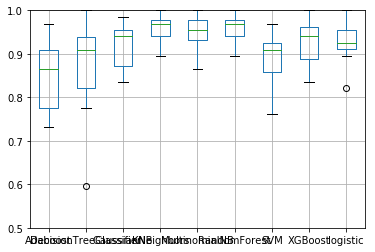

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.014925,0.597015,0.835821,0.925373,0.865672,0.895522,0.925373,0.835821,0.820896
1,0.373134,0.791045,0.955224,0.985075,0.985075,0.985075,0.865672,0.970149,0.970149
2,0.805970,0.791045,0.895522,0.940299,0.940299,0.940299,0.805970,0.880597,0.955224
3,0.731343,0.865672,0.895522,0.940299,0.940299,0.940299,0.761194,0.895522,0.910448
4,0.880597,0.910448,0.955224,1.000000,1.000000,1.000000,0.910448,0.955224,0.970149
5,0.910448,0.910448,0.940299,0.970149,0.985075,0.970149,0.895522,0.940299,0.955224
6,0.746269,0.776119,0.850746,0.895522,0.925373,0.895522,0.761194,0.865672,0.910448
7,0.820896,0.850746,0.910448,0.940299,0.925373,0.955224,0.880597,0.925373,0.910448
8,0.865672,0.940299,0.850746,0.970149,0.895522,0.970149,0.850746,0.925373,0.925373
9,0.805970,0.865672,0.955224,0.955224,0.955224,0.955224,0.925373,0.955224,0.895522


In [17]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in classifier.items():
    kfold = KFold(n_splits=15, random_state=0)
    results = cross_val_score(c, X, y, cv=kfold)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[np.mean(results)]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
#     sns.boxplot( result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
#     plt.ylabel('Accuracy')
#     plt.xticks(parameter_df['mean'])
# print(res)
res.columns = ['Adaboost','DecisionTreeClassifier','GaussianNB','KNeighbors','MultinomialNB','RandomForest','SVM',
          'XGBoost','logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.5,1.0])
plt.show()
res

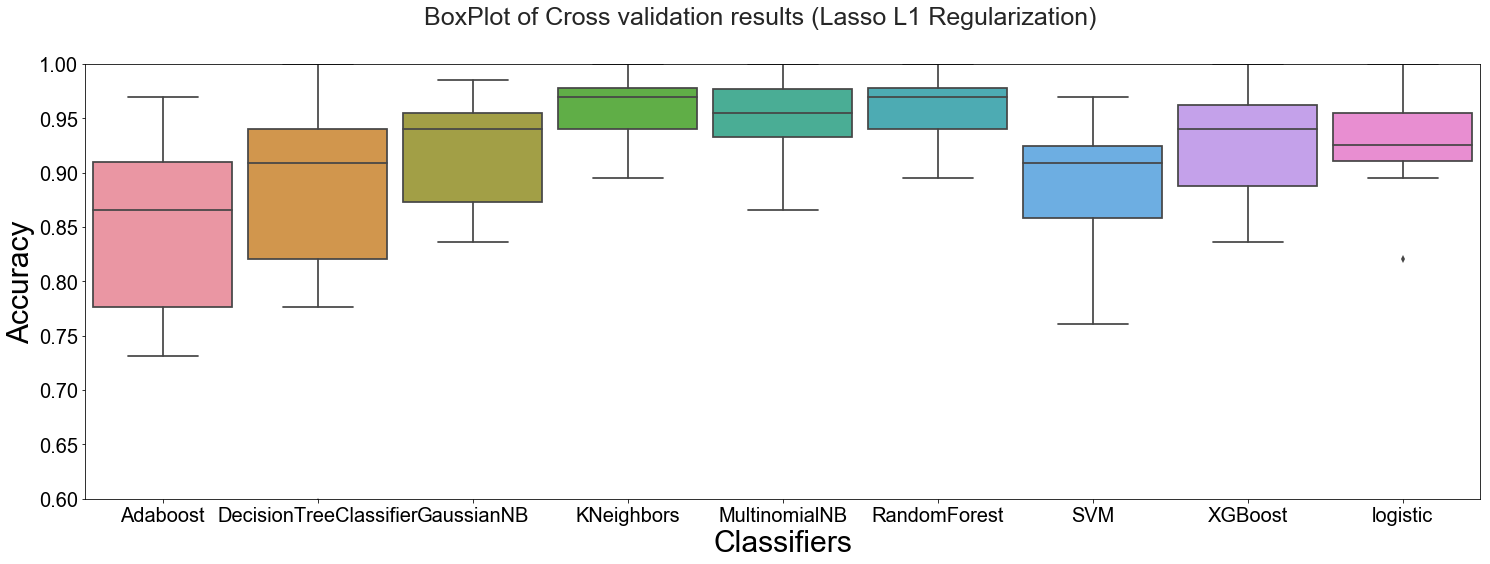

In [18]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.6,1.0])
fig.suptitle('BoxPlot of Cross validation results (Lasso L1 Regularization)', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/Lasso_graph2.png')
plt.show()

In [19]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
MultinomialNB,0.774793
GaussianNB,0.876466
logistic,0.920157
RandomForest,0.958058
Adaboost,0.949073
XGBoost,0.958073
KNeighbors,0.884261
SVM,0.926112
DecisionTreeClassifier,0.929067


###  friedman alignment ranking test for the methods:

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import itertools as it

def friedman_aligned_ranks_test(*args):
    k = len(args)
    if k < 2: raise ValueError('Less than 2 levels')
    n = len(args[0])
    if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

    aligned_observations = []
    for i in range(n):
        loc = sp.mean([col[i] for col in args])
        aligned_observations.extend([col[i] - loc for col in args])
        
    aligned_observations_sort = sorted(aligned_observations)
    
    aligned_ranks = []
    for i in range(n):
        row = []
        for j in range(k):
            v = aligned_observations[i*k+j]
            row.append(aligned_observations_sort.index(v) + 1 + (aligned_observations_sort.count(v)-1)/2.)
        aligned_ranks.append(row)

    rankings_avg = [sp.mean([case[j] for case in aligned_ranks]) for j in range(k)]
    rankings_cmp = [r/sp.sqrt(k*(n*k+1)/6.) for r in rankings_avg]

    r_i = [np.sum(case) for case in aligned_ranks]
    r_j = [np.sum([case[j] for case in aligned_ranks]) for j in range(k)]
    T = (k-1) * (sp.sum(v**2 for v in r_j) - (k*n**2/4.) * (k*n+1)**2) / float(((k*n*(k*n+1)*(2*k*n+1))/6.) - (1./float(k))*sp.sum(v**2 for v in r_i))

    p_value = 1 - st.chi2.cdf(T, k-1)

    return T, p_value, rankings_avg, rankings_cmp

In [20]:
p=friedman_aligned_ranks_test( res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(60.05821532463015, 4.5400527781680466e-10, [91.43333333333334, 70.06666666666666, 75.56666666666666, 99.9, 22.2, 73.6, 98.1, 39.1, 42.03333333333333], [6.401613784148052, 4.905647894378127, 5.2907249174858295, 6.994399019719909, 1.5543108932710907, 5.153030709223075, 6.868373812157388, 2.737547564274759, 2.942921976598867])


In [21]:
def training(clf,X_train,y_train):
    clf.fit(X_train,y_train)
    
def predict(clf,X_test):
    return clf.predict(X_test)

### Accuracy and precision 


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=11)
 Total time in : 
 0.407900333404541
Confusion_matrix 
 [[144   6]
 [  5 145]]
0.9602649006622517
0.9666666666666667
AUC: 0.963

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Total time in : 
 0.007997989654541016
Confusion_matrix 
 [[141   9]
 [  6 144]]
0.9411764705882353
0.96
AUC: 0.950

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.015996456146240234
Confusion_matrix 
 [[126  24]
 [ 13 137]]
0.8509316770186336
0.9133333333333333
AUC: 0.877

 Classifier is: 
 KNeighborsClassifier(algorit

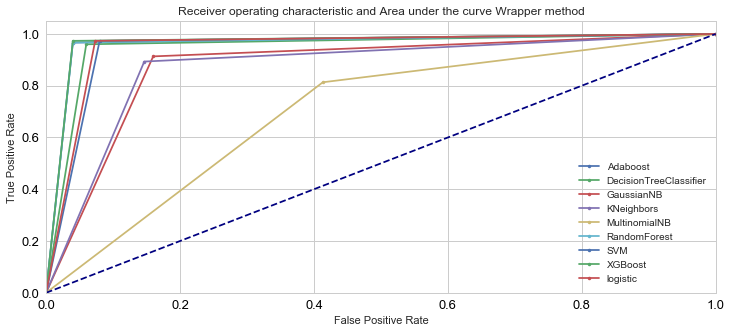

In [22]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=metrics.precision_score(y_test, pred)
    print(precision)
    recall=metrics.recall_score(y_test, pred)
    print(recall)
#     ROC AND AUC CURVE
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    plt.plot(fpr, tpr,marker='.',label=n)
    # plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve Wrapper method',fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/Lasso_graph3.png')
plt.show()

In [23]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
Adaboost,0.963333,0.960265,0.966667,96.333333
DecisionTreeClassifier,0.950000,0.941176,0.960000,95.000000
GaussianNB,0.876667,0.850932,0.913333,87.666667
KNeighbors,0.873333,0.858974,0.893333,87.333333
MultinomialNB,0.700000,0.663043,0.813333,70.000000
RandomForest,0.963333,0.960265,0.966667,96.333333
SVM,0.946667,0.924051,0.973333,94.666667
XGBoost,0.966667,0.960526,0.973333,96.666667
logistic,0.950000,0.929936,0.973333,95.000000


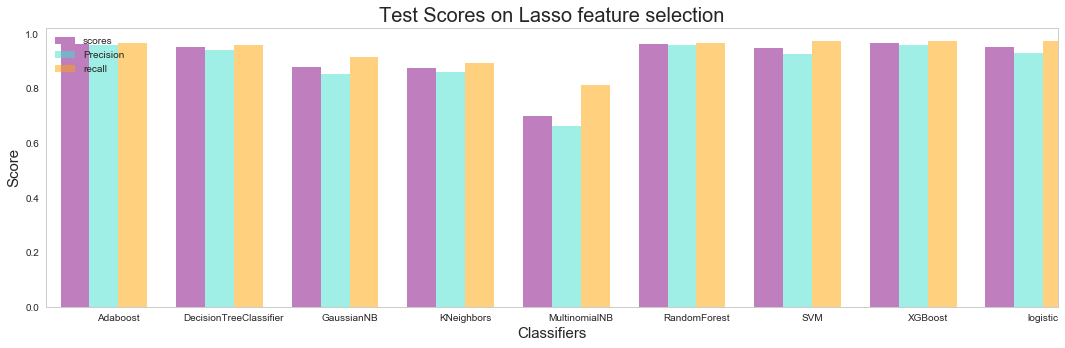

In [26]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on Lasso feature selection',fontsize=20)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall'])] )
# plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
plt.savefig('C:/Users/hp/Practice_Code/Feature_on_Phishing_Data_Code/Plotted_graph/Lasso_graph1.png')
plt.show()